In [609]:
import pandas as pd
import numpy as np

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

import nltk

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)
pd.set_option('display.precision', 2)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

## Data Collection 

- Obtained song lyrics from Kaggle
- Create dataframe using just rap music with english lyrics

In [661]:
df = pd.read_csv('lyrics_features.csv')
df2 = pd.read_csv('parts_dataset.csv')
df3 = pd.read_csv('songs_dataset.csv')

In [102]:
df3.head()

,Singer,Album,Song,Date,Featuring,Genre,Lyrics,Tags,Producers,Writers
0,$UICIDEBOY$,7th or St. Tammany,40 Oz. & Sober,2015-04-02,[],"['Alternative/Indie', 'Hip-Hop/Rap']","\n\n[Hook: Gangsta Pat]\nKiller, killer, kille...","['Alternative', 'Rap']",['Jck Ruby'],"['Scott Arceneaux Jr.', 'Aristos Petrou']"
1,$UICIDEBOY$,7th or St. Tammany,7th or St. Tammany,2015-04-02,[],['Hip-Hop/Rap'],"\n\nUh\n*59, yah!\nUhhhh, [?]\n*59 motherfucke...",['Rap'],['Budd Dwyer'],"['Scott Arceneaux Jr.', 'Aristos Petrou', 'Mas..."
2,$UICIDEBOY$,7th or St. Tammany,Dead Batteries,2015-03-19,[],['Hip-Hop/Rap'],\n\n[Produced by Budd Dwyer]\n\n[Intro: Frayse...,['Rap'],['Budd Dwyer'],"['Scott Arceneaux Jr.', 'Aristos Petrou']"
3,$UICIDEBOY$,7th or St. Tammany,Drugs/Hoes/Money/Etc.,2015-04-02,[],['Hip-Hop/Rap'],\n\n[Verse 1: YUNG $NOW]\nCounting sheep until...,['Rap'],['Budd Dwyer'],"['Scott Arceneaux Jr.', 'Aristos Petrou']"
4,$UICIDEBOY$,7th or St. Tammany,I’ll Pay for It (If I Want It),2015-04-02,[],['Hip-Hop/Rap'],\n\n[Verse 1: RUBY DA CHERRY]\nFucking Ruby go...,['Rap'],['Budd Dwyer'],"['Scott Arceneaux Jr.', 'Aristos Petrou']"


In [5]:
df3['id'] = df3['Singer']+df3['Song']
df2['id'] = df2['Singer']+df2['Song']

In [7]:
df_m = pd.merge(df2, df3[['id','Date','Genre','Tags']], how = 'left', on = 'id')
df_m.drop(columns = ['id'], inplace = True)
df_m['Year'] = df_m['Date'].str[:4]
df_m['Part Lyrics'] = df_m['Part Lyrics'].str.replace('\n', ' ')

In [8]:
hh_df = df_m[(df_m.Genre.str.contains('Rap'))&(df_m['Part Name'] == 'Verse')]

In [670]:
rappers = ['Animal ДжаZ','Аквариум','Ёлка', 'Аффинаж', 'БИ-2', 'Баста', 'Борис Гребенщиков', 'Бьянка',
       'Вера Брежнева', 'Время и Стекло', 'Гарри Топор',
       'Гражданская оборона', 'Гречка', 'Грязь', 'Гуф', 'Децл', 'Джиган',
       'Дима Билан', 'Егор Крид', 'Егор Натс', 'Ежемесячные',
       'Елена Темникова', 'Жак-Энтони', 'Замай', 'Зараза', 'Земфира',
       'Иван Дорн', 'Ка-тет', 'Карандаш', 'Каспийский Груз', 'Каста',
       'Кино', 'Кровосток', 'ЛСП', 'Леван Горозия', 'Луперкаль',
       'МЫ / WE', 'Макс Корж', 'Мот', 'Мэйти', 'Ноггано', 'Овсянкин',
       'Пасош', 'Пика', 'СД', 'Сектор газа', 'Сергей Лазарев',
       'Скриптонит', 'Слава КПСС', 'Смоки Мо', 'Сплин', 'Сява',
       'Тима Белорусских', 'Тимати', 'Тони Раут', 'Триагрутрика',
       'Тридцать Девятый', 'ХХОС', 'Хаски', 'Хлеб', 'ШЕFF', 'Шляпники',
       'Элджей', 'Эрика Лундмоен', 'Ярмак', 'дима бамберг',
       '\u200bмонеточка','Red Hot Chili Peppers','Eric Clapton','Japan','Enrique Iglesias',
        'BLACKPINK','BTS', 'Backstreet Boys','Coldplay']

In [10]:
hh_df = hh_df[~hh_df['Singer'].isin(rappers)]
hh_df

,Singer,Album,Song,Part Singer,Part Name,Part Lyrics,Date,Genre,Tags,Year
1,$UICIDEBOY$,7th or St. Tammany,40 Oz. & Sober,$UICIDEBOY$,Verse,"Bitch, I be the $nowmane Fifty nine shades of ...",2015-04-02,"['Alternative/Indie', 'Hip-Hop/Rap']","['Alternative', 'Rap']",2015
2,$UICIDEBOY$,7th or St. Tammany,40 Oz. & Sober,$UICIDEBOY$,Verse,"Yesterday, I rode my bike to the moon Or thoug...",2015-04-02,"['Alternative/Indie', 'Hip-Hop/Rap']","['Alternative', 'Rap']",2015
5,$UICIDEBOY$,7th or St. Tammany,Dead Batteries,$UICIDEBOY$,Verse,Bitches know I got the vendetta Rollin' up the...,2015-03-19,['Hip-Hop/Rap'],['Rap'],2015
7,$UICIDEBOY$,7th or St. Tammany,Dead Batteries,$UICIDEBOY$,Verse,Here I come to paint it grey Whip look like I ...,2015-03-19,['Hip-Hop/Rap'],['Rap'],2015
9,$UICIDEBOY$,7th or St. Tammany,Drugs/Hoes/Money/Etc.,$UICIDEBOY$,Verse,Counting sheep until I'm sound asleep I'm loun...,2015-04-02,['Hip-Hop/Rap'],['Rap'],2015
...,...,...,...,...,...,...,...,...,...,...
665510,will.i.am,NaN,T.H.E. (The Hardest Ever),will.i.am,Verse,"You can get that, or you can get this You can ...",2011-11-20,"['Pop', 'Hip-Hop/Rap']","['Electronic', 'Pop', 'Rap']",2011
665514,will.i.am,NaN,T.H.E. (The Hardest Ever),Mick Jagger,Verse,"Hard like a rock 'n roll Time bomb's ticking, ...",2011-11-20,"['Pop', 'Hip-Hop/Rap']","['Electronic', 'Pop', 'Rap']",2011
665537,will.i.am,NaN,Will.i.am,will.i.am,Verse,Y’all wanna call me a sad man Nigga I’m ballin...,2017-02-23,['Hip-Hop/Rap'],['Rap'],2017
665547,will.i.am,NaN,You And Me,will.i.am,Verse,"You my uno, you my uno You my number one, yup ...",NaN,"['Pop', 'Hip-Hop/Rap']","['Trap', 'Electronic', 'Pop', 'Rap']",NaN


In [11]:
hh_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122571 entries, 1 to 665550
Data columns (total 10 columns):
Singer         122571 non-null object
Album          98413 non-null object
Song           122571 non-null object
Part Singer    122571 non-null object
Part Name      122571 non-null object
Part Lyrics    122571 non-null object
Date           102140 non-null object
Genre          122571 non-null object
Tags           122571 non-null object
Year           102140 non-null object
dtypes: object(10)
memory usage: 10.3+ MB


In [ ]:
from langdetect import detect

def langdet(s):
    try:
        return detect(s)
    except:
        return np.nan

hh_df['lang'] = hh_df['Part Lyrics'].apply(langdet)

In [ ]:
hh_df.lang.value_counts()

In [ ]:
hh_df = hh_df[hh_df.lang == 'en']
hh_df.info()

In [ ]:
with open('hh_df.pkl', 'wb') as picklefile:
    pickle.dump(hh_df, picklefile)

## Preprocessing

- Used verse lyrics only
- Removed numbers, captial letters and punctuation
- Stemming

In [125]:
import pickle

with open("hh_df.pkl", 'rb') as picklefile: 
    hh_df = pickle.load(picklefile)

In [128]:
hh_df.head(3)

,Singer,Album,Song,Part Singer,Part Name,Part Lyrics,Date,Genre,Tags,Year,lang,lyrics_nostem
1,$UICIDEBOY$,7th or St. Tammany,40 Oz. & Sober,$UICIDEBOY$,Verse,"Bitch, I be the $nowmane Fifty nine shades of ...",2015-04-02,"['Alternative/Indie', 'Hip-Hop/Rap']","['Alternative', 'Rap']",2015,en,"Bitch, I be the $nowmane Fifty nine shades of ..."
2,$UICIDEBOY$,7th or St. Tammany,40 Oz. & Sober,$UICIDEBOY$,Verse,"Yesterday, I rode my bike to the moon Or thoug...",2015-04-02,"['Alternative/Indie', 'Hip-Hop/Rap']","['Alternative', 'Rap']",2015,en,"Yesterday, I rode my bike to the moon Or thoug..."
5,$UICIDEBOY$,7th or St. Tammany,Dead Batteries,$UICIDEBOY$,Verse,Bitches know I got the vendetta Rollin' up the...,2015-03-19,['Hip-Hop/Rap'],['Rap'],2015,en,Bitches know I got the vendetta Rollin' up the...


In [127]:
hh_df['lyrics_nostem'] = hh_df['Part Lyrics']

In [129]:
d = hh_df[~hh_df.Year.isna()]
song_count = d.groupby(['Year'], as_index = False).agg({'Song':'count'})

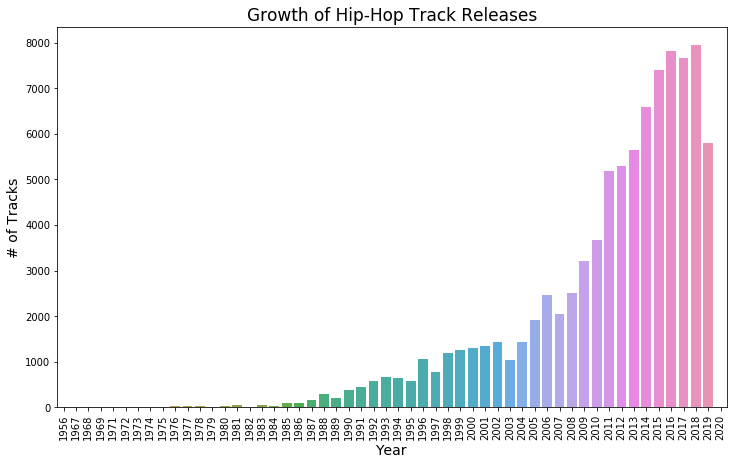

In [918]:
plt.figure(figsize = [12, 7])

sns.barplot(song_count['Year'],song_count['Song'])
plt.title('Growth of Hip-Hop Track Releases', fontsize = 17)
plt.ylabel('# of Tracks', fontsize = 14)
plt.xlabel('Year', fontsize = 14)
plt.xticks(rotation = 90);

In [131]:
#  Text preprocessing steps - remove numbers, captial letters and punctuation
import re
import string

alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())
 
hh_df['Part Lyrics'] = hh_df['Part Lyrics'].map(alphanumeric).map(punc_lower)                               
                                                  

In [132]:
hh_df.head()

,Singer,Album,Song,Part Singer,Part Name,Part Lyrics,Date,Genre,Tags,Year,lang,lyrics_nostem
1,$UICIDEBOY$,7th or St. Tammany,40 Oz. & Sober,$UICIDEBOY$,Verse,bitch i be the nowmane fifty nine shades of ...,2015-04-02,"['Alternative/Indie', 'Hip-Hop/Rap']","['Alternative', 'Rap']",2015,en,"Bitch, I be the $nowmane Fifty nine shades of ..."
2,$UICIDEBOY$,7th or St. Tammany,40 Oz. & Sober,$UICIDEBOY$,Verse,yesterday i rode my bike to the moon or thoug...,2015-04-02,"['Alternative/Indie', 'Hip-Hop/Rap']","['Alternative', 'Rap']",2015,en,"Yesterday, I rode my bike to the moon Or thoug..."
5,$UICIDEBOY$,7th or St. Tammany,Dead Batteries,$UICIDEBOY$,Verse,bitches know i got the vendetta rollin up the...,2015-03-19,['Hip-Hop/Rap'],['Rap'],2015,en,Bitches know I got the vendetta Rollin' up the...
7,$UICIDEBOY$,7th or St. Tammany,Dead Batteries,$UICIDEBOY$,Verse,here i come to paint it grey whip look like i ...,2015-03-19,['Hip-Hop/Rap'],['Rap'],2015,en,Here I come to paint it grey Whip look like I ...
9,$UICIDEBOY$,7th or St. Tammany,Drugs/Hoes/Money/Etc.,$UICIDEBOY$,Verse,counting sheep until i m sound asleep i m loun...,2015-04-02,['Hip-Hop/Rap'],['Rap'],2015,en,Counting sheep until I'm sound asleep I'm loun...


In [ ]:
# fix spelling error
#from autocorrect import spell

#hh_df['lyrics_fixed'] = hh_df['Part Lyrics'].apply(lambda string: ' '.join(map(spell, string.split())))

In [133]:
# Stemming
from nltk.stem.lancaster import LancasterStemmer

stemmer = LancasterStemmer()
stemming = lambda x: stemmer.stem(x)

hh_df['Part Lyrics'] = hh_df['Part Lyrics'].apply(lambda x: ' '.join(list(map(stemming, x.split(' ')))))       

In [135]:
with open('hh_df_v2.pkl', 'wb') as picklefile:
    pickle.dump(hh_df, picklefile)

In [1035]:
with open("hh_df_v2.pkl", 'rb') as picklefile: 
    hh_df = pickle.load(picklefile)

## Topic Modeling

### NMF Modeling

#### Finding Topics and further preprocessing

In [1036]:
from sklearn.decomposition import NMF
from sklearn.metrics.pairwise import cosine_similarity

1) TFIDF and topic modeling

In [1037]:
hh_df

,Singer,Album,Song,Part Singer,Part Name,Part Lyrics,Date,Genre,Tags,Year,lang,lyrics_nostem
1,$UICIDEBOY$,7th or St. Tammany,40 Oz. & Sober,$UICIDEBOY$,Verse,bitch i be the nowm fifty nin shad of grey ...,2015-04-02,"['Alternative/Indie', 'Hip-Hop/Rap']","['Alternative', 'Rap']",2015,en,"Bitch, I be the $nowmane Fifty nine shades of ..."
2,$UICIDEBOY$,7th or St. Tammany,40 Oz. & Sober,$UICIDEBOY$,Verse,yesterday i rod my bik to the moon or thought...,2015-04-02,"['Alternative/Indie', 'Hip-Hop/Rap']","['Alternative', 'Rap']",2015,en,"Yesterday, I rode my bike to the moon Or thoug..."
5,$UICIDEBOY$,7th or St. Tammany,Dead Batteries,$UICIDEBOY$,Verse,bitch know i got the vendett rollin up the le...,2015-03-19,['Hip-Hop/Rap'],['Rap'],2015,en,Bitches know I got the vendetta Rollin' up the...
7,$UICIDEBOY$,7th or St. Tammany,Dead Batteries,$UICIDEBOY$,Verse,her i com to paint it grey whip look lik i dri...,2015-03-19,['Hip-Hop/Rap'],['Rap'],2015,en,Here I come to paint it grey Whip look like I ...
9,$UICIDEBOY$,7th or St. Tammany,Drugs/Hoes/Money/Etc.,$UICIDEBOY$,Verse,count sheep until i m sound asleep i m loung d...,2015-04-02,['Hip-Hop/Rap'],['Rap'],2015,en,Counting sheep until I'm sound asleep I'm loun...
...,...,...,...,...,...,...,...,...,...,...,...,...
665510,will.i.am,NaN,T.H.E. (The Hardest Ever),will.i.am,Verse,you can get that or you can get thi you can c...,2011-11-20,"['Pop', 'Hip-Hop/Rap']","['Electronic', 'Pop', 'Rap']",2011,en,"You can get that, or you can get this You can ..."
665514,will.i.am,NaN,T.H.E. (The Hardest Ever),Mick Jagger,Verse,hard lik a rock n rol tim bomb s tick explod...,2011-11-20,"['Pop', 'Hip-Hop/Rap']","['Electronic', 'Pop', 'Rap']",2011,en,"Hard like a rock 'n roll Time bomb's ticking, ..."
665537,will.i.am,NaN,Will.i.am,will.i.am,Verse,y’all wann cal me a sad man nigg i’m ballin n...,2017-02-23,['Hip-Hop/Rap'],['Rap'],2017,en,Y’all wanna call me a sad man Nigga I’m ballin...
665547,will.i.am,NaN,You And Me,will.i.am,Verse,you my uno you my uno you my numb on yup fir...,NaN,"['Pop', 'Hip-Hop/Rap']","['Trap', 'Electronic', 'Pop', 'Rap']",NaN,en,"You my uno, you my uno You my number one, yup ..."


In [1038]:
# Vectorizing with tfidf

english = ({'whil','play','damn', 'wish','talk', 'walk', 'hear', 'around', 'much','right','tight', 'whit', 'keep', 'tryn','but', 'isn', 
            'under', 'weren', 'those', 'when', 'why', 'few', 'for', 'it', 'of', 'down', 'ma', 'over', 'd', 'during', 'shouldn', 'did', 'above',
            'below', 'myself', 'further', 'very', 'same', 'too', 'does', 'through', 'from', 'didn', 'whom', 'and', 'am', 'such', 'out', 'or', 
            'me', 'has', 'will', 'shan', 'on', 'then', 'here', 't', 'with', 'some', 'what', 'don', 'were', 'an', 'themselves', 'yourselves', 
            'off', 'being', 'more', 'they', 'ourselves', 'into', 'my', 'them', 'ain', 'a', 'wouldn', 'itself', 'i', 'hasn', 'her', 'their', 
            'mustn', 'our', 'herself', 'where', 'hers', 'once', 'any', 'theirs', 'before', 'most', 'other', 'not', 'himself', 'his', 'if', 'he',
            'each', 'are', 'how', 'couldn', 'ours', 'doing', 'hadn', 'needn', 'again', 'these', 'wasn', 'nor', 'do', 'just', 'so', 'we', 
            'there', 'have', 'by', 'o', 'than', 're', 'while', 'your', 'at', 'him', 'own', 'can', 'you', 'll', 'between', 'been', 'that', 'is',
            'she', 'yours', 'this', 'was', 'be', 'had', 'doesn', 'no', 'because', 'won', 'both', 'to', 'against', 'aren', 'y', 'after', 'all', 
            'up', 've', 'should', 'as', 'in', 'the', 'having', 'until', 'who', 'haven', 'only', 'm', 'yourself', 'about', 's', 'stil', 'look',
            'wher', 'every', 'might', 'which', 'now', 'mightn', 'its', 'gettin', 'gonn', 'gott', 'said', 'could', 'wann', 'thing', 'ther',
            'would', 'bout','mayb', 'someth', 'sometim', 'think'})

In [1039]:
doc_word.shape

(109840, 457)

In [ ]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [1040]:
tfidf = TfidfVectorizer(stop_words= english, token_pattern= '\w{4,}', max_df = .20, min_df = .015)
doc_word  = tfidf.fit_transform(hh_df['Part Lyrics'])

nmf = NMF(9, init='random', random_state= 31) 
doc_topic = nmf.fit_transform(doc_word)
display_topics(nmf, tfidf.get_feature_names(), 20)


Topic  0
money, cash, count, funny, spend, stack, hundr, bank, pocket, doll, talkin, show, hustl, noth, brok, nothin, long, paid, fast, comin

Topic  1
mind, peopl, hard, night, alway, world, start, thought, heart, chang, stay, told, long, dream, find, away, turn, friend, first, though

Topic  2
good, hood, head, enough, night, everyth, doin, friend, coupl, littl, feelin, lookin, morn, cook, everybody, best, chick, party, tonight, mean

Topic  3
young, smok, trap, shoot, diamond, rich, gang, hundr, whip, brick, chain, round, gucc, work, lean, high, wrist, hous, cash, whol

Topic  4
pussy, dick, fuckin, suck, talkin, told, lick, head, motherfuck, motherfuckin, goin, bust, stick, kiss, lookin, leav, beat, okay, throw, nothin

Topic  5
baby, crazy, lady, daddy, body, night, tonight, show, kiss, momm, shawty, pleas, hold, leav, littl, driv, wait, slow, lookin, goin

Topic  6
black, stop, rock, head, watch, beat, drop, flow, shot, motherfuck, check, block, rhym, hand, spit, body, dead, bus

In [1041]:
# Topic identification
dic = {0: 'Money', 1: 'Unsure', 2: 'Hood Life', 3: 'Drug/Gangster', 4: 'Sex', 5: 'Love/Affection', 6: 'Rapping/Skills', 7: 'Emotion/Hardship', 8: 'Club/Hookup'}

In [1042]:
# Assigning majority topic
topic_list = doc_topic.argmax(axis=1)
hh_df['topic'] = topic_list

In [1043]:
# Topic Coef
hh_df['top_coef'] = [i for i in doc_topic]

2) Topic reviewing

In [1044]:
hh_df[hh_df.topic == 1].iloc[345,11]

"I go hard in the mother fuckin kitchen Using baby bottles for the lean, wifey say I'm trippin Plus I got Maybelline smeared right below my zipper I’m a kama sutra reader and a conjure drinker Hot on the stove, smoking like reefer This work ain’t bout shit, that’s why its cheaper This ho ain’t bout shit, that’s why she cheaper All we blow is strong, that’s why you weaker! Wait up, your status change when your weight up Waiting on the meal, I already put my plate up! Nigga fall back up, I already put my rake up Everytime I leave the booth, they put yellow tape up Hair weave killer, messing up her make-up Pyrex vision and I’m bout to cook a cake up Get a fork, add a little water Get on any track, and I ride it like Marauder"

In [1045]:
hh_df[hh_df.topic == 5].iloc[21,13]

array([0.00094467, 0.08500796, 0.00099459, 0.        , 0.09978208,
       0.49450812, 0.        , 0.00050988, 0.        ])

#### Aggregating to the song level from verse level documents

In [1046]:
no_unsure = hh_df[~(hh_df.topic == 1)]

In [1048]:
df = no_unsure.groupby(['Singer','Album','Song','Year','Date']).top_coef.apply(lambda x : np.mean(x)).reset_index()
rap_df = pd.DataFrame(df)

In [1049]:
rap_df.head(3)

,Singer,Album,Song,Year,Date,top_coef
0,$UICIDEBOY$,7th or St. Tammany,40 Oz. & Sober,2015,2015-04-02,"[0.0, 0.09134410278955402, 0.0, 0.103005551534..."
1,$UICIDEBOY$,7th or St. Tammany,Dead Batteries,2015,2015-03-19,"[0.0006795291493419057, 0.0, 0.0, 0.0071255702..."
2,$UICIDEBOY$,7th or St. Tammany,Drugs/Hoes/Money/Etc.,2015,2015-04-02,"[0.012087499840015241, 0.029928013443757333, 0..."


In [1050]:
topic_list = []
for document in rap_df['top_coef']:
    maj_topic = document.argmax()
    topic_list.append(maj_topic)

rap_df['topic'] = topic_list

In [1159]:
dic = {0: 'Money', 1: 'Unsure', 2: 'Hood Life', 3: 'Drug/Gangster', 4: 'Sex', 5: 'Love/Affection', 6: 'Music/Rap Skills', 7: 'Emotion/Hardship', 8: 'Club/Hookup'}

topic_names = []
for i in rap_df['topic']:
    topic = dic[i]
    topic_names.append(topic)
    
rap_df['topic_names'] = topic_names

#### Analyzing topic changes over time

In [1160]:
def year_range(x):
    if x < '1980':
        return '1970s or older'
    elif x>='1980' and x<'1985':
        return '1980-1985'
    elif x>='1985' and x<'1990':
        return '1985-1990'
    elif x>='1990' and x<'1995':
        return '1990-1995'
    elif x>='1995' and x<'2000':
        return '1995-2000'
    elif x>='2000' and x<'2005':
        return '2000-2005'
    elif x>='2005' and x<'2010':
        return '2005-2010'
    elif x>='2010' and x<'2015':
        return '2010-2015'
    else:
        return '2015-2020'

rap_df['year_range'] = rap_df.Year.apply(year_range)
rap_df.head()

,Singer,Album,Song,Year,Date,top_coef,topic,topic_names,year_range
0,$UICIDEBOY$,7th or St. Tammany,40 Oz. & Sober,2015,2015-04-02,"[0.0, 0.09134410278955402, 0.0, 0.103005551534...",3,Drug/Gangster,2015-2020
1,$UICIDEBOY$,7th or St. Tammany,Dead Batteries,2015,2015-03-19,"[0.0006795291493419057, 0.0, 0.0, 0.0071255702...",6,Music/Rap Skills,2015-2020
2,$UICIDEBOY$,7th or St. Tammany,Drugs/Hoes/Money/Etc.,2015,2015-04-02,"[0.012087499840015241, 0.029928013443757333, 0...",6,Music/Rap Skills,2015-2020
3,$UICIDEBOY$,7th or St. Tammany,I’ll Pay for It (If I Want It),2015,2015-04-02,"[0.08435964611053715, 0.009378802805212682, 0....",6,Music/Rap Skills,2015-2020
4,$UICIDEBOY$,7th or St. Tammany,Leave Your Things Behind,2015,2015-04-02,"[0.0, 0.0654807867879982, 0.0, 0.0, 0.0, 0.005...",6,Music/Rap Skills,2015-2020


In [1161]:
topic_change = rap_df.groupby(['year_range','topic_names'], as_index = False).Song.count()
topic_change 

,year_range,topic_names,Song
0,1970s or older,Club/Hookup,2
1,1970s or older,Drug/Gangster,3
2,1970s or older,Emotion/Hardship,8
3,1970s or older,Hood Life,7
4,1970s or older,Love/Affection,5
...,...,...,...
75,2015-2020,Love/Affection,1012
76,2015-2020,Money,2602
77,2015-2020,Music/Rap Skills,901
78,2015-2020,Sex,1096


In [1162]:
total = topic_change.groupby('year_range', as_index = False).Song.sum().rename(columns = {'Song': 'Total'})
topic_change = pd.merge(topic_change, total, how = 'left', on = 'year_range')
topic_change['ratio'] = topic_change['Song']/topic_change['Total']
topic_change

,year_range,topic_names,Song,Total,ratio
0,1970s or older,Club/Hookup,2,38,0.05
1,1970s or older,Drug/Gangster,3,38,0.08
2,1970s or older,Emotion/Hardship,8,38,0.21
3,1970s or older,Hood Life,7,38,0.18
4,1970s or older,Love/Affection,5,38,0.13
...,...,...,...,...,...
75,2015-2020,Love/Affection,1012,10495,0.10
76,2015-2020,Money,2602,10495,0.25
77,2015-2020,Music/Rap Skills,901,10495,0.09
78,2015-2020,Sex,1096,10495,0.10


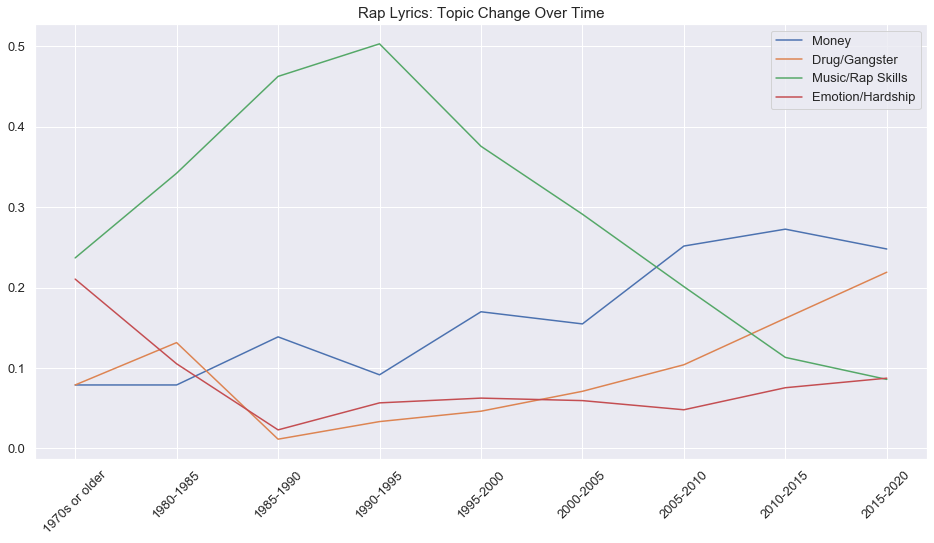

In [1163]:
def makegraph(topic_chage):
    dic = {0: 'Money', 3: 'Drug/Gangster', 6: 'Music/Rap Skills', 7: 'Emotion/Hardship'}
    #dic = {0: 'Money', 2: 'Hood Life', 3: 'Drug/Gangster', 4: 'Sex', 5: 'Love/Affection', 6: 'Rap Skills', 7: 'Emotion/Hardship', 8: 'Club/Hookup'}
    plt.figure(figsize = [16, 8])  
    plt.xticks(rotation = 45, fontsize = 13)
    plt.yticks(fontsize = 13)
    plt.title('Rap Lyrics: Topic Change Over Time', fontsize = 15)
    for key, value in dic.items():
        df = topic_change[topic_change.topic_names == value]
        plt.plot(df.year_range, df.ratio, label = value)
        plt.legend(fontsize = 13)


makegraph(topic_change)

#### Lyrics: Lil Wayne vs Kanye West

In [1057]:
lw_df = rap_df[rap_df.Singer == 'Lil Wayne']
lw_df

,Singer,Album,Song,Year,Date,top_coef,topic,topic_names,year_range
12126,Lil Wayne,500 Degreez,500 Degreez,2002,2002-07-23,"[0.06746558783243843, 0.03225998241284756, 0.0...",5,Love/Affection,2000-2005
12127,Lil Wayne,500 Degreez,Believe That,2002,2002-07-23,"[0.010082515377322996, 0.0, 0.1773802775534920...",2,Hood Life,2000-2005
12128,Lil Wayne,500 Degreez,Bloodline,2002,2002-07-23,"[0.002541392154770522, 0.03471559708159655, 0....",3,Drug/Gangster,2000-2005
12129,Lil Wayne,500 Degreez,Fo Sheezy,2002,2002-07-23,"[0.061351392637628184, 0.05844566979859551, 0....",2,Hood Life,2000-2005
12130,Lil Wayne,500 Degreez,Fuck You,2002,2002-07-23,"[0.20766683813361925, 0.03551955430305959, 0.0...",0,Money,2000-2005
...,...,...,...,...,...,...,...,...,...
12614,Lil Wayne,Young Money Mixtape Vol 1.,Bass Beat,2005,2005-12-13,"[0.2756840374687323, 0.055261064575270503, 0.0...",0,Money,2005-2010
12615,Lil Wayne,Young Money Mixtape Vol 1.,Dis How We Do,2006,2006-10-10,"[0.16004430663936275, 0.010478498725421262, 0....",2,Hood Life,2005-2010
12616,Lil Wayne,Young Money Mixtape Vol 1.,I Call It Whateva,2005,2005-10-10,"[0.10526843628318629, 0.0864777343598982, 0.0,...",5,Love/Affection,2005-2010
12617,Lil Wayne,Young Money Mixtape Vol 1.,Lean Back,2006,2006-10-06,"[0.22573055527244965, 0.06301966174705256, 0.0...",0,Money,2005-2010


In [1058]:
topic_change_lw = lw_df.groupby(['year_range','topic_names'], as_index = False).Song.count()
total_lw = topic_change_lw.groupby('year_range', as_index = False).Song.sum().rename(columns = {'Song': 'Total'})
topic_change_lw = pd.merge(topic_change_lw, total_lw, how = 'left', on = 'year_range')
topic_change_lw['ratio'] = topic_change_lw['Song']/topic_change_lw['Total']
topic_change_lw

,year_range,topic_names,Song,Total,ratio
0,1995-2000,Club/Hookup,1,14,0.07
1,1995-2000,Drug/Gangster,3,14,0.21
2,1995-2000,Hood Life,1,14,0.07
3,1995-2000,Money,3,14,0.21
4,1995-2000,Rap Skills,6,14,0.43
5,2000-2005,Club/Hookup,2,54,0.04
6,2000-2005,Drug/Gangster,9,54,0.17
7,2000-2005,Emotion/Hardship,1,54,0.02
8,2000-2005,Hood Life,4,54,0.07
9,2000-2005,Love/Affection,8,54,0.15


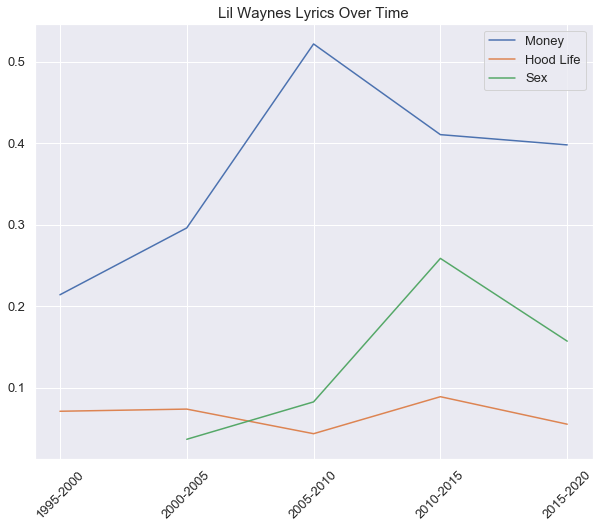

In [1060]:
dic = {0: 'Money',2: 'Hood Life', 4: 'Sex'}

plt.figure(figsize = [10, 8]) 
plt.xticks(rotation = 45, fontsize = 13)
plt.yticks(fontsize = 13)
plt.title('Lil Waynes Lyrics Over Time', fontsize = 15)

for key, value in dic.items():
    df = topic_change_lw[topic_change_lw.topic_names == value]
    plt.plot(df.year_range, df.ratio, label = value)
    plt.legend(fontsize = 13)


#### Kanye West Lyrics

In [1061]:
kw_df = rap_df[rap_df.Singer == 'Kanye West']
topic_change_kw = kw_df.groupby(['year_range','topic_names'], as_index = False).Song.count()
total_kw = topic_change_kw.groupby('year_range', as_index = False).Song.sum().rename(columns = {'Song': 'Total'})
topic_change_kw = pd.merge(topic_change_kw, total_kw, how = 'left', on = 'year_range')
topic_change_kw['ratio'] = topic_change_kw['Song']/topic_change_kw['Total']
topic_change_kw

,year_range,topic_names,Song,Total,ratio
0,2000-2005,Club/Hookup,3,12,0.25
1,2000-2005,Emotion/Hardship,1,12,0.08
2,2000-2005,Hood Life,2,12,0.17
3,2000-2005,Money,3,12,0.25
4,2000-2005,Rap Skills,2,12,0.17
5,2000-2005,Unsure,1,12,0.08
6,2005-2010,Club/Hookup,3,34,0.09
7,2005-2010,Drug/Gangster,2,34,0.06
8,2005-2010,Emotion/Hardship,2,34,0.06
9,2005-2010,Hood Life,9,34,0.26


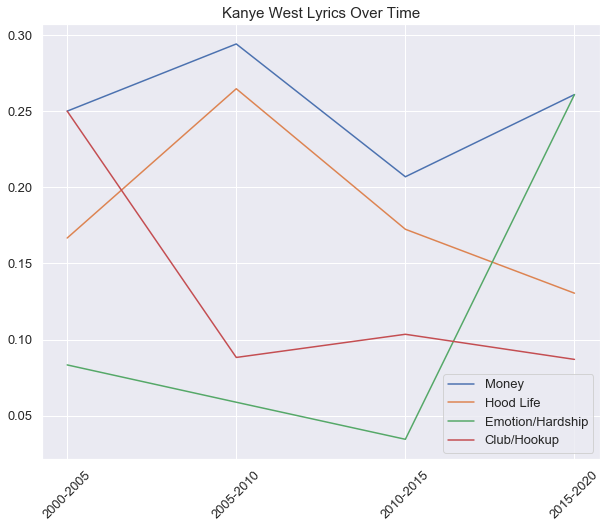

In [1062]:
dic = {0: 'Money',2: 'Hood Life', 7: 'Emotion/Hardship', 8: 'Club/Hookup'}

plt.figure(figsize = [10, 8]) 
plt.xticks(rotation = 45, fontsize = 13)
plt.yticks(fontsize = 13)
plt.title('Kanye West Lyrics Over Time', fontsize = 15)

for key, value in dic.items():
    df = topic_change_kw[topic_change_kw.topic_names == value]
    plt.plot(df.year_range, df.ratio, label = value)
    plt.legend(fontsize = 13)

## Other useful EDA

### Topic Distribution

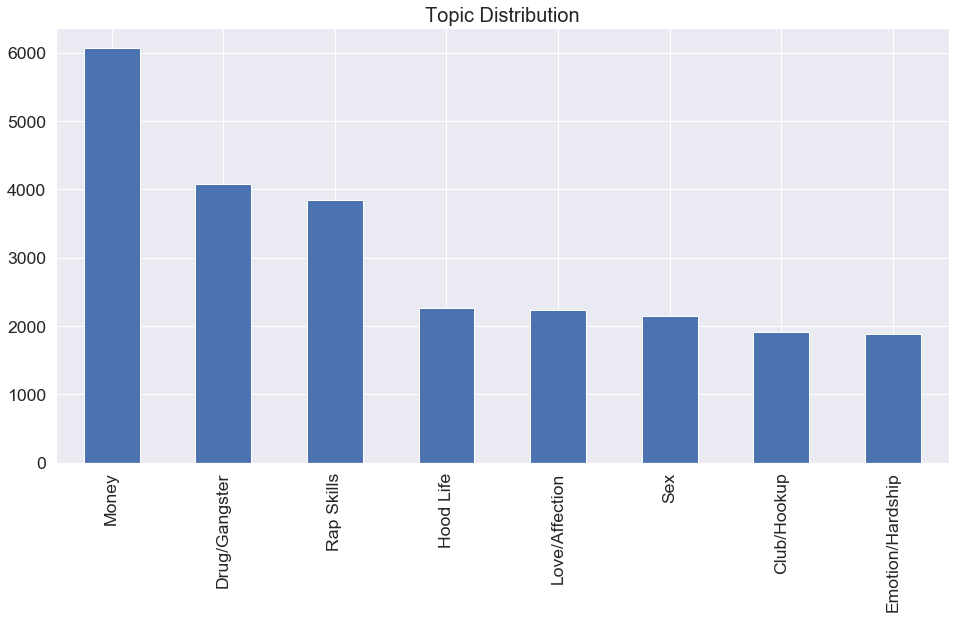

In [1155]:
plt.figure(figsize = [16,8])
sns.set(font_scale=1.6)
plt.title('Topic Distribution', fontsize =20)

rap_df[~(rap_df.topic_names == 'Unsure')].topic_names.value_counts().plot(kind='bar')

### Brands and celebrities appearance in lyrics

In [1065]:
alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())
 
hh_df['lyrics_nostem'] = hh_df['lyrics_nostem'].map(alphanumeric).map(punc_lower)                               

In [1072]:
hh_df = hh_df.drop(hh_df[hh_df['Year'] == '2020'].index)

In [1104]:
hh_df = hh_df.drop(hh_df[hh_df['Year'] <'1990'].index)

In [1115]:
def vocab(word):
    hh_df[word] = hh_df['lyrics_nostem'].str.contains(word)
    hh_df[word] = hh_df[word].apply(lambda x: 1 if x == True else 0)
    df = hh_df.groupby('Year', as_index = False)[word].sum()
    return plt.plot(df['Year'], df[word], label = word)

No handles with labels found to put in legend.


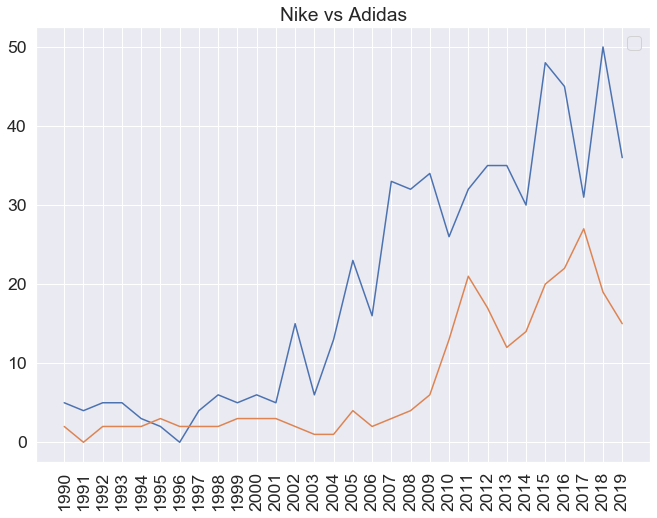

In [1166]:
plt.figure(figsize = [11,8])
plt.xticks(rotation = 90)
plt.legend()
plt. title('Nike vs Adidas')

vocab('nike')
vocab('adidas')

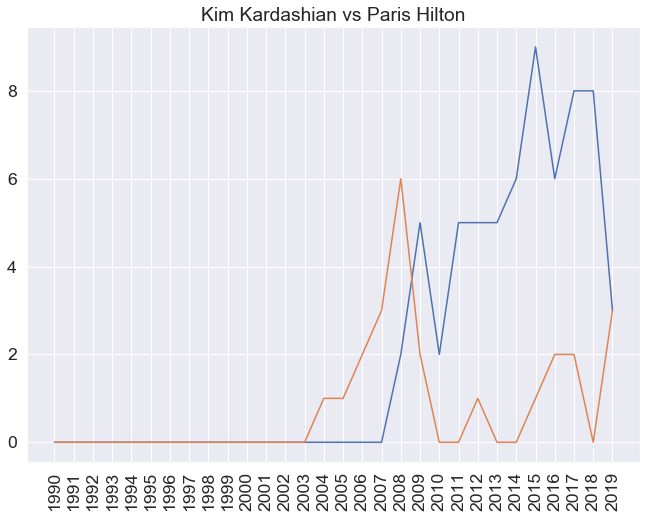

In [1169]:
plt.figure(figsize = [11,8])
plt.xticks(rotation = 90)
plt. title('Kim Kardashian vs Paris Hilton')

vocab('kardashian')
vocab('paris hilton')

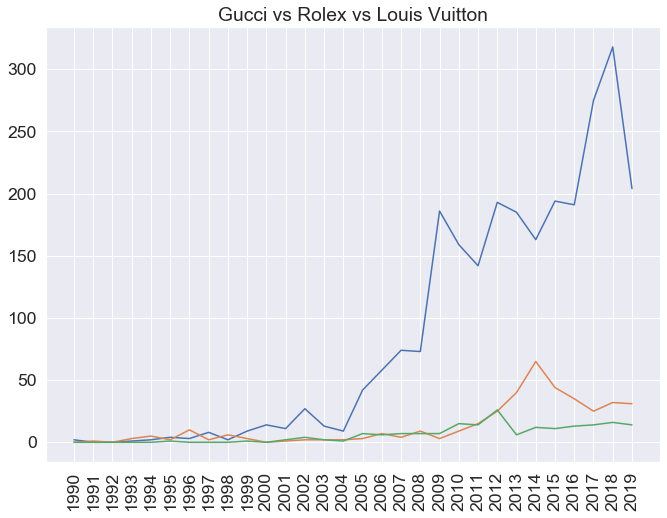

In [1168]:
plt.figure(figsize = [11,8])
plt.xticks(rotation = 90)
plt. title('Gucci vs Rolex vs Louis Vuitton')

vocab('gucci')
vocab('rolex')
vocab('vuitton')

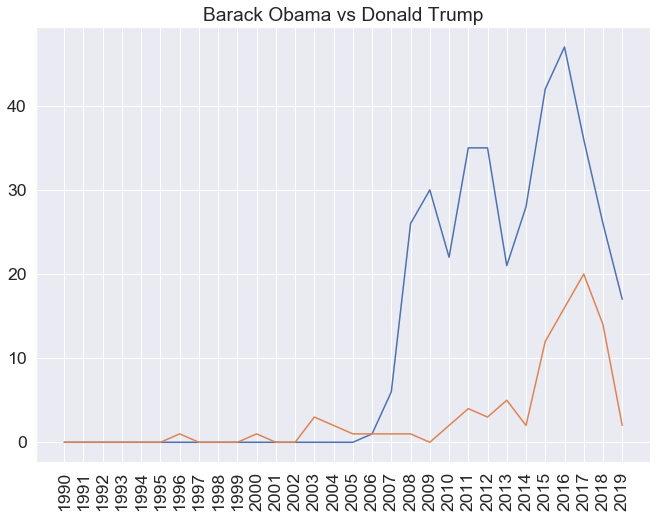

In [1171]:
plt.figure(figsize = [11,8])
plt.xticks(rotation = 90)
plt. title('Barack Obama vs Donald Trump')

#vocab('bill clinton')
vocab('obama')
vocab('donald trump')

In [1014]:
hh_df.groupby(['nike','Year'],as_index = False).agg({"Song":"count"})

,nike,Year,Song
0,False,1956,2
1,False,1967,8
2,False,1968,7
3,False,1969,5
4,False,1971,4
...,...,...,...
80,True,2015,48
81,True,2016,45
82,True,2017,31
83,True,2018,50


### Changes in word counts over time

In [664]:
# remove non-lyrics related

df3['Lyrics'] = df3.Lyrics.apply(lambda x: x.replace('\n', ' '))
df3['Lyrics'] = df3.Lyrics.apply(lambda x: x.replace('[', ''))
df3['Lyrics'] = df3.Lyrics.apply(lambda x: x.replace(']', ''))
df3['Lyrics'] = df3.Lyrics.apply(lambda x: x.replace('hook', ''))
df3['Lyrics'] = df3.Lyrics.apply(lambda x: x.replace('verse', ''))
df3['Lyrics'] = df3.Lyrics.apply(lambda x: x.replace('intro', ''))

In [667]:
# remove alphanumerics and punctuations

import re
import string

alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())

df3['Lyrics'] = df3['Lyrics'].map(alphanumeric).map(punc_lower)      

In [668]:
df3 = df3[df3['Genre'].str.contains('Rap')]

In [ ]:
# remove raps with foreign languages

df3 = df3[~(df3['Singer'].isin(rappers))]

In [674]:
df3

,Singer,Album,Song,Date,Featuring,Genre,Lyrics,Tags,Producers,Writers
0,$UICIDEBOY$,7th or St. Tammany,40 Oz. & Sober,2015-04-02,[],"['Alternative/Indie', 'Hip-Hop/Rap']",gangsta pat killer killer killer what th...,"['Alternative', 'Rap']",['Jck Ruby'],"['Scott Arceneaux Jr.', 'Aristos Petrou']"
1,$UICIDEBOY$,7th or St. Tammany,7th or St. Tammany,2015-04-02,[],['Hip-Hop/Rap'],uh yah uhhhh motherfucker west ba...,['Rap'],['Budd Dwyer'],"['Scott Arceneaux Jr.', 'Aristos Petrou', 'Mas..."
2,$UICIDEBOY$,7th or St. Tammany,Dead Batteries,2015-03-19,[],['Hip-Hop/Rap'],produced by budd dwyer frayser boy hit th...,['Rap'],['Budd Dwyer'],"['Scott Arceneaux Jr.', 'Aristos Petrou']"
3,$UICIDEBOY$,7th or St. Tammany,Drugs/Hoes/Money/Etc.,2015-04-02,[],['Hip-Hop/Rap'],yung now counting sheep until i m sound...,['Rap'],['Budd Dwyer'],"['Scott Arceneaux Jr.', 'Aristos Petrou']"
4,$UICIDEBOY$,7th or St. Tammany,I’ll Pay for It (If I Want It),2015-04-02,[],['Hip-Hop/Rap'],ruby da cherry fucking ruby got a blunt ...,['Rap'],['Budd Dwyer'],"['Scott Arceneaux Jr.', 'Aristos Petrou']"
...,...,...,...,...,...,...,...,...,...,...
246894,will.i.am,NaN,Samurai Jack - Theme Song,NaN,['Mako Iwamatsu'],['Hip-Hop/Rap'],aku long ago in a distant land i aku th...,['Rap'],[],['will.i.am']
246899,will.i.am,NaN,T.H.E. (The Hardest Ever),2011-11-20,"['Jennifer Lopez', 'Mick Jagger']","['Pop', 'Hip-Hop/Rap']",chorus jennifer lopez will i am you can g...,"['Electronic', 'Pop', 'Rap']","['will.i.am', 'Dallas Austin', 'Audiobot']","['Kenneth Oliver', 'Tanya Lacey', 'will.i.am']"
246907,will.i.am,NaN,Will.i.am,2017-02-23,[],['Hip-Hop/Rap'],niko told y’all niggas to stand down sh...,['Rap'],[],['will.i.am']
246908,will.i.am,NaN,Yes We Can,2008-02-02,['Barack Obama'],['Hip-Hop/Rap'],all obama lyrics are sampled from a campai...,['Rap'],['will.i.am'],['will.i.am']


In [676]:
df3['#characters'] = df3.Lyrics.str.len()
df3['#words'] = df3.Lyrics.str.split().str.len()
df3['#uniq_words'] = df3.Lyrics.apply(lambda x: len(set(x.split())))
df3['lexical_density'] = df3['#uniq_words'] / df3['#words']
df3

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

,Singer,Album,Song,Date,Featuring,Genre,Lyrics,Tags,Producers,Writers,#characters,#words,#uniq_words,lexical_density
0,$UICIDEBOY$,7th or St. Tammany,40 Oz. & Sober,2015-04-02,[],"['Alternative/Indie', 'Hip-Hop/Rap']",gangsta pat killer killer killer what th...,"['Alternative', 'Rap']",['Jck Ruby'],"['Scott Arceneaux Jr.', 'Aristos Petrou']",2281,434,156,0.36
1,$UICIDEBOY$,7th or St. Tammany,7th or St. Tammany,2015-04-02,[],['Hip-Hop/Rap'],uh yah uhhhh motherfucker west ba...,['Rap'],['Budd Dwyer'],"['Scott Arceneaux Jr.', 'Aristos Petrou', 'Mas...",443,78,22,0.28
2,$UICIDEBOY$,7th or St. Tammany,Dead Batteries,2015-03-19,[],['Hip-Hop/Rap'],produced by budd dwyer frayser boy hit th...,['Rap'],['Budd Dwyer'],"['Scott Arceneaux Jr.', 'Aristos Petrou']",2097,403,154,0.38
3,$UICIDEBOY$,7th or St. Tammany,Drugs/Hoes/Money/Etc.,2015-04-02,[],['Hip-Hop/Rap'],yung now counting sheep until i m sound...,['Rap'],['Budd Dwyer'],"['Scott Arceneaux Jr.', 'Aristos Petrou']",1195,246,139,0.57
4,$UICIDEBOY$,7th or St. Tammany,I’ll Pay for It (If I Want It),2015-04-02,[],['Hip-Hop/Rap'],ruby da cherry fucking ruby got a blunt ...,['Rap'],['Budd Dwyer'],"['Scott Arceneaux Jr.', 'Aristos Petrou']",1254,252,149,0.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246894,will.i.am,NaN,Samurai Jack - Theme Song,NaN,['Mako Iwamatsu'],['Hip-Hop/Rap'],aku long ago in a distant land i aku th...,['Rap'],[],['will.i.am'],530,99,64,0.65
246899,will.i.am,NaN,T.H.E. (The Hardest Ever),2011-11-20,"['Jennifer Lopez', 'Mick Jagger']","['Pop', 'Hip-Hop/Rap']",chorus jennifer lopez will i am you can g...,"['Electronic', 'Pop', 'Rap']","['will.i.am', 'Dallas Austin', 'Audiobot']","['Kenneth Oliver', 'Tanya Lacey', 'will.i.am']",3227,732,174,0.24
246907,will.i.am,NaN,Will.i.am,2017-02-23,[],['Hip-Hop/Rap'],niko told y’all niggas to stand down sh...,['Rap'],[],['will.i.am'],1376,272,102,0.38
246908,will.i.am,NaN,Yes We Can,2008-02-02,['Barack Obama'],['Hip-Hop/Rap'],all obama lyrics are sampled from a campai...,['Rap'],['will.i.am'],['will.i.am'],2989,558,193,0.35


In [679]:
df3['Year'] = df3['Date'].str[:4]

df3.head()

,Singer,Album,Song,Date,Featuring,Genre,Lyrics,Tags,Producers,Writers,#characters,#words,#uniq_words,lexical_density,Year
0,$UICIDEBOY$,7th or St. Tammany,40 Oz. & Sober,2015-04-02,[],"['Alternative/Indie', 'Hip-Hop/Rap']",gangsta pat killer killer killer what th...,"['Alternative', 'Rap']",['Jck Ruby'],"['Scott Arceneaux Jr.', 'Aristos Petrou']",2281,434,156,0.36,2015
1,$UICIDEBOY$,7th or St. Tammany,7th or St. Tammany,2015-04-02,[],['Hip-Hop/Rap'],uh yah uhhhh motherfucker west ba...,['Rap'],['Budd Dwyer'],"['Scott Arceneaux Jr.', 'Aristos Petrou', 'Mas...",443,78,22,0.28,2015
2,$UICIDEBOY$,7th or St. Tammany,Dead Batteries,2015-03-19,[],['Hip-Hop/Rap'],produced by budd dwyer frayser boy hit th...,['Rap'],['Budd Dwyer'],"['Scott Arceneaux Jr.', 'Aristos Petrou']",2097,403,154,0.38,2015
3,$UICIDEBOY$,7th or St. Tammany,Drugs/Hoes/Money/Etc.,2015-04-02,[],['Hip-Hop/Rap'],yung now counting sheep until i m sound...,['Rap'],['Budd Dwyer'],"['Scott Arceneaux Jr.', 'Aristos Petrou']",1195,246,139,0.57,2015
4,$UICIDEBOY$,7th or St. Tammany,I’ll Pay for It (If I Want It),2015-04-02,[],['Hip-Hop/Rap'],ruby da cherry fucking ruby got a blunt ...,['Rap'],['Budd Dwyer'],"['Scott Arceneaux Jr.', 'Aristos Petrou']",1254,252,149,0.59,2015


In [685]:
df_words = df3.groupby('Year', as_index = False).agg({'#characters': 'median', '#words': 'median', '#uniq_words': 'median'})
df_words.drop(df_words[df_words['Year'] == '2021'].index, inplace=True)

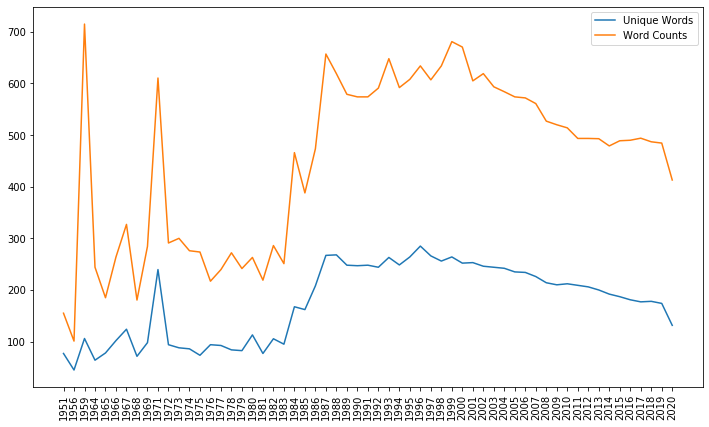

In [690]:
plt.figure(figsize = [12,7])
plt.plot(df_words.Year, df_words['#uniq_words'], label = 'Unique Words')
plt.plot(df_words.Year, df_words['#words'], label = 'Word Counts')
plt.legend()

plt.xticks(rotation = 90);

In [625]:
from langdetect import detect

def langdet(s):
    try:
        return detect(s)
    except:
        return np.nan
    


df3['lang'] = df3['part_lyrics'].apply(langdet)

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


## Recommendation based on song lyrics

In [779]:
from sklearn.metrics import pairwise_distances
d = pairwise_distances(list(rap_df['top_coef']),metric='cosine')

In [786]:
d.shape

(25272, 25272)

In [883]:
def recommend(artist, song):
    index = rap_df[(rap_df.Singer == artist) & (rap_df.Song == song)].index[0]
    for rec in d[index].argsort()[1:6]:
        print(rap_df.iloc[rec, 0:5], '\n')
    

In [885]:
recommend('Nelly', 'Dilemma (Jermaine Dupri Remix)')

Singer       Aaron Cole
Album     NOT BY CHANCE
Song       CASSIUS CLAY
Year               2019
Date         2019-08-30
Name: 1278, dtype: object 

Singer           PARTYNEXTDOOR
Album     Jahron B. Collection
Song             Table For Two
Year                      2011
Date                2011-02-17
Name: 16130, dtype: object 

Singer           Kelis
Album     Kaleidoscope
Song        Good Stuff
Year              1999
Date        1999-12-07
Name: 10575, dtype: object 

Singer                  Macklemore
Album     The Language of My World
Song          Remember High School
Year                          2005
Date                    2005-10-10
Name: 13648, dtype: object 

Singer                                       LMFAO
Album     Sorry for Party Rocking (Deluxe Version)
Song                                    Best Night
Year                                          2011
Date                                    2011-06-17
Name: 11384, dtype: object 



In [900]:
recommend('Wiz Khalifa', 'Rolling Papers 2')

Singer                   Wale
Album     Back to the Feature
Song                  Chillin
Year                     2009
Date               2009-04-14
Name: 22735, dtype: object 

Singer          Chief Keef
Album     The Leek, Vol. 3
Song            This Bitch
Year                  2015
Date            2015-07-23
Name: 3476, dtype: object 

Singer         Mustard
Album      Cold Summer
Song      Know My Name
Year              2016
Date        2016-09-30
Name: 14888, dtype: object 

Singer            Lil Uzi Vert
Album     The Perfect LUV Tape
Song            Do What I Want
Year                      2016
Date                2016-07-31
Name: 12099, dtype: object 

Singer       Hoodie Allen
Album        All American
Song      No Interruption
Year                 2012
Date           2012-03-29
Name: 8284, dtype: object 

